In [1]:
IOR_HSW_DIR="/global/cscratch1/sd/fbench/IOR_Temp17/IOR_HSW"
IOR_DVS_DIR="/global/cscratch1/sd/fbench/IOR_Temp17/IOR_DVS/1node_posix_fpp/CORI_dvs_1"
# temporary location for all users: /global/cscratch1/sd/fbench/IOR_Temp17

#  Functions Extracting Max Read/Write and Date of IOR JOB

In [22]:
def parser_ior(dir_path,nodes_posixmpi_dir,block_size,rw_plot,ptitle,latest=None):
    '''
        dir_path: the log path 
        nodes_posixmpi: specify the sub directory # e.g., 1node_posix_fpp
        block_size: _10000_, _100000_, _1000000_ # the IOR block size
        rw_plot: read or write, or readwrite # plot them separately
        ptitle: title for the figure
        latest: only plot the last few days' logs, e.g., latest=20, the last 20 days' log
    '''
    import re,os,time
    import datetime as dt
    dir_tolook=dir_path+"/"+nodes_posixmpi_dir
    #print dir_tolook
    i=0
    ior_dates=[]
    ior_read=[]
    ior_write=[]
    for filename in os.listdir(dir_tolook):
        if filename.endswith("IOR") and re.search(str(block_size),filename):
            file=open(dir_tolook+'/'+filename,'r') 
            stat = os.stat(dir_tolook+'/'+filename)
            xxt=(dt.datetime.strptime(
                    time.ctime(os.path.getmtime(dir_tolook+'/'+filename))
                    ,'%a %b %d %H:%M:%S %Y').date())
            #print xxt
            row = file.readlines()
            for line in row:
                if re.search("Max Write",line):
                    ior_write.append(line.split(' ')[2])
                    ior_dates.append(xxt)
                elif re.search("Max Read",line):
                    ior_read.append(line.split(' ')[3])

    #assert len(ior_dates)==len(ior_read), "len dates %d, len read %d"%(len(ior_dates),len(ior_read))
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    %matplotlib inline
    #x = [dt.datetime.strftime(d,'%m-%d-%Y') for d in ior_dates]
    x=ior_dates
    x=x[-latest:]
    #print x
    import pandas as pd
    dfior=pd.DataFrame(data=x,columns=["date"],index=None) # construct dataframe
    dfior['date']=dfior['date'].astype('datetime64[ns]')
    dfior['read']=ior_read[-latest:]
    dfior['write']=ior_write[-latest:]
    print dfior
    dfior=dfior.sort_values(by=['date'],axis=0)
    print dfior
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().set_xticks(x)
    #plt.gca().xaxis.set_major_locator(Null)
    plt.ylabel("MiB/s")
    plt.xlabel("Date")
    plt.title(ptitle)
    #plt.xaxis
    fig = plt.gcf()
    fig.set_size_inches(16, 6.5)
    #fig.savefig('test2png.png', dpi=100)
    if (rw_plot=="readwrite"):
        plt.plot(dfior.date,dfior.read,'-o',label="read")
        plt.plot(dfior.date,dfior.write,'-ro',label="write")
        plt.legend(["Read","Write"],loc="upper right")
    elif (rw_plot=="read"):
        plt.plot(dfior.date,dfior.read,'-ro',label="read")
    elif(rw_plot=="write"):
        plt.plot(dfior.date,dfior.write,'-ro',label="write")
    
    plt.setp( plt.gca().xaxis.get_majorticklabels(), rotation=80 )
    #plt.gcf().autofmt_xdate()
    #plt.savefig("/global/homes/j/jialin/cori_dvs.png",dpi=500)

# Plot the IOR Test for Project DVS

         date     read    write
0  2017-04-24  6617.41  6826.45
1  2017-01-21  6707.46  6135.51
2  2017-03-20  7095.44  6486.77
3  2016-12-19  6140.73  4965.06
4  2017-02-23  3592.52  5536.10
5  2016-11-28  6480.95  6101.67
6  2017-04-28  6147.15  5685.13
7  2016-12-10  7464.17  6368.12
8  2017-02-03  6313.25  6132.99
9  2017-03-18  5110.21  5015.44
10 2017-02-18  3216.41  5449.92
11 2017-05-01  6319.70  6125.88
12 2017-03-14  5672.80  4845.01
13 2017-05-04  5500.00  3997.34
14 2016-12-15  6297.40  1322.99
15 2017-02-26  5173.05  3843.82
16 2016-12-12  6801.11  3066.31
17 2017-04-21  6159.87  6503.39
18 2017-02-17  5534.73  4920.34
19 2017-04-09  6199.51  5945.92
         date     read    write
5  2016-11-28  6480.95  6101.67
7  2016-12-10  7464.17  6368.12
16 2016-12-12  6801.11  3066.31
14 2016-12-15  6297.40  1322.99
3  2016-12-19  6140.73  4965.06
1  2017-01-21  6707.46  6135.51
8  2017-02-03  6313.25  6132.99
18 2017-02-17  5534.73  4920.34
10 2017-02-18  3216.41  5449.92
4  2017-

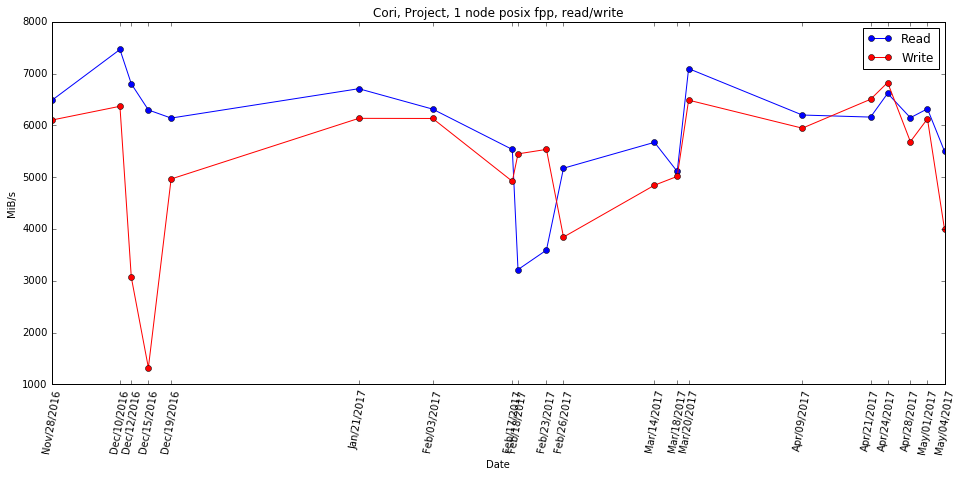

In [23]:
NODES_POSIXMPI_DIR=""
BLOCK_SIZE="_1000000_" #10000, 100000
title="Cori, Project, 1 node posix fpp, read/write"
latest=20
xd=parser_ior(IOR_DVS_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=latest)

# IOR for CSCRATCH from Haswell

1 node POSIX File per Process

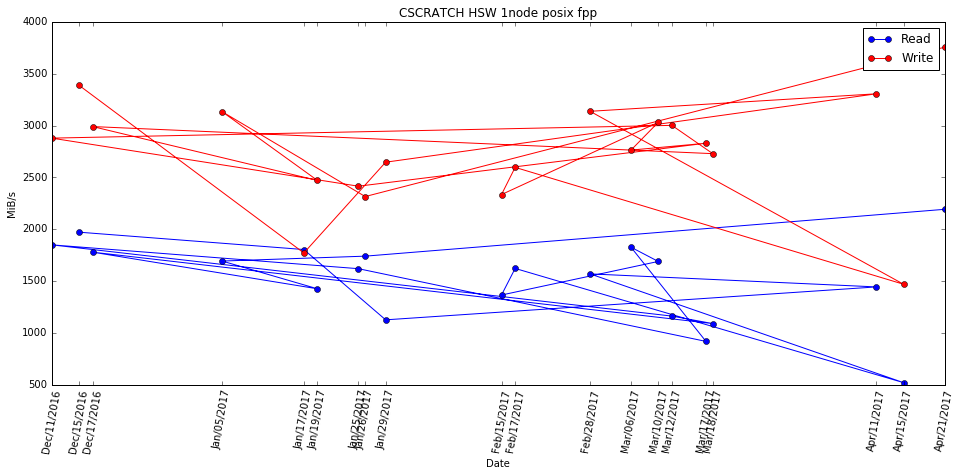

In [4]:
NODES_POSIXMPI_DIR="1node_posix_fpp"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node posix fpp"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite

1 Node Posix Single Shared File

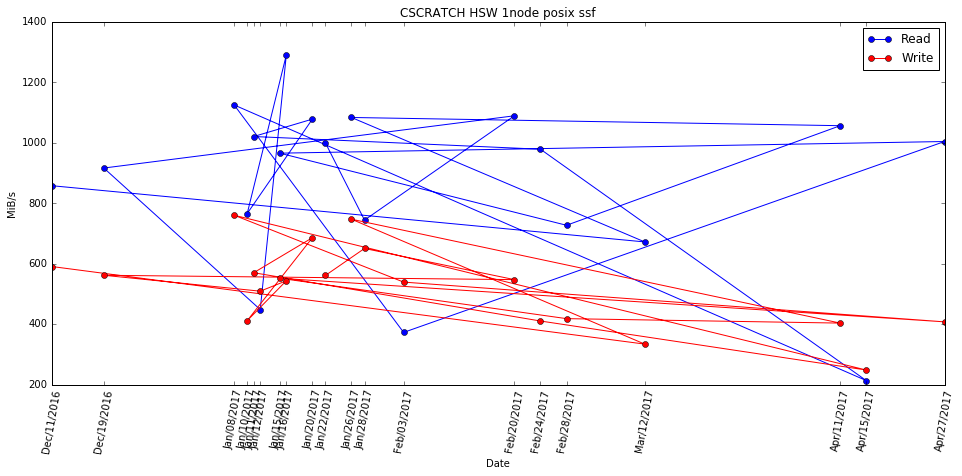

In [5]:
NODES_POSIXMPI_DIR="1node_posix_ssf"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node posix ssf"
latest=20
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=latest) # options are read, write, readwrite

1 Node MPIIO Single Shared File

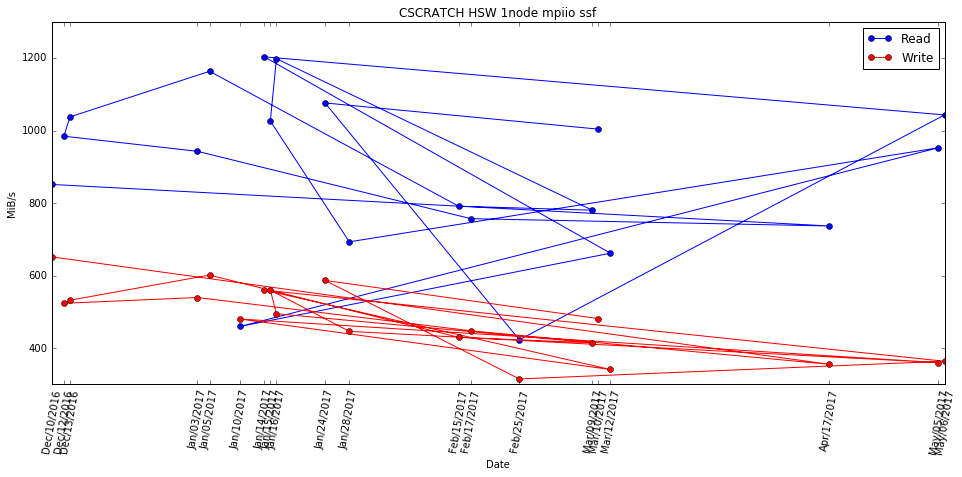

In [6]:
NODES_POSIXMPI_DIR="1node_mpiio_ssf"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node mpiio ssf"
latest=20
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite

1 Node MPIIO File per Process

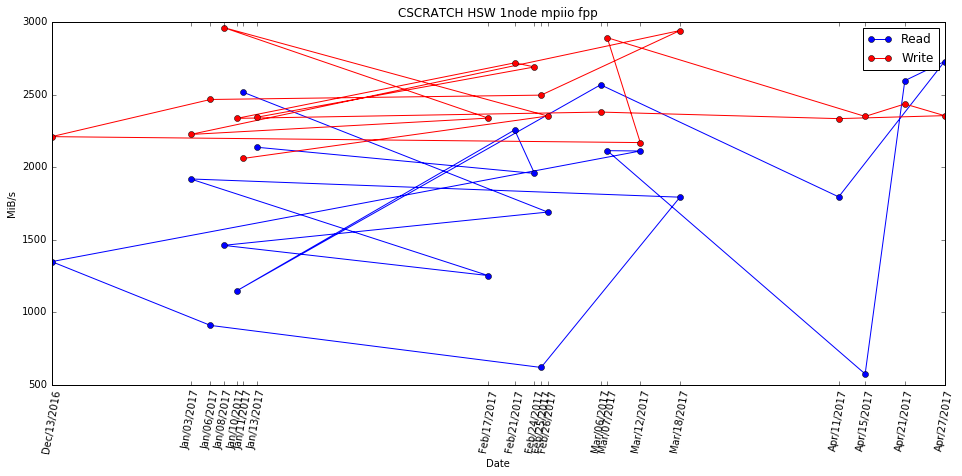

In [7]:
NODES_POSIXMPI_DIR="1node_mpiio_fpp"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node mpiio fpp"
latest=20
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=latest) # options are read, write, readwrite

32 Node POSIX Single Shared File

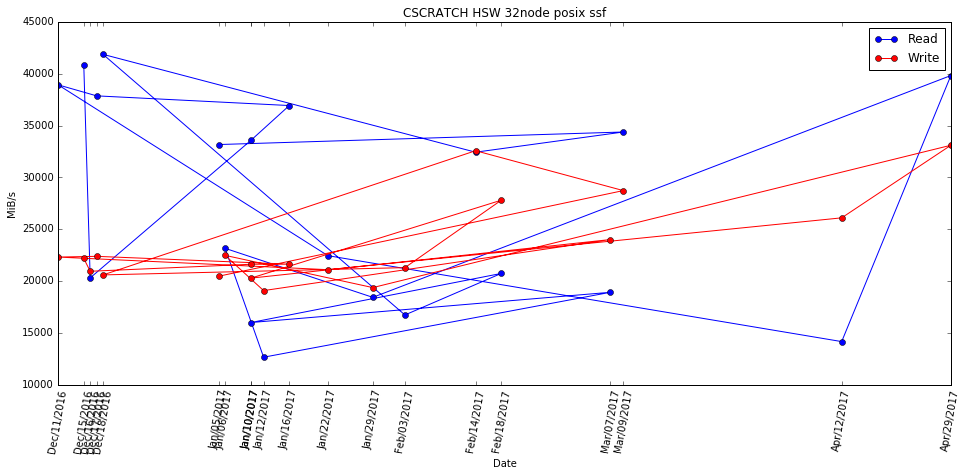

In [8]:
NODES_POSIXMPI_DIR="32node_posix_ssf"
BLOCK_SIZE="ssf" #the 32 node job has different name
title="CSCRATCH HSW 32node posix ssf"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite

32 Node POSIX File per Process

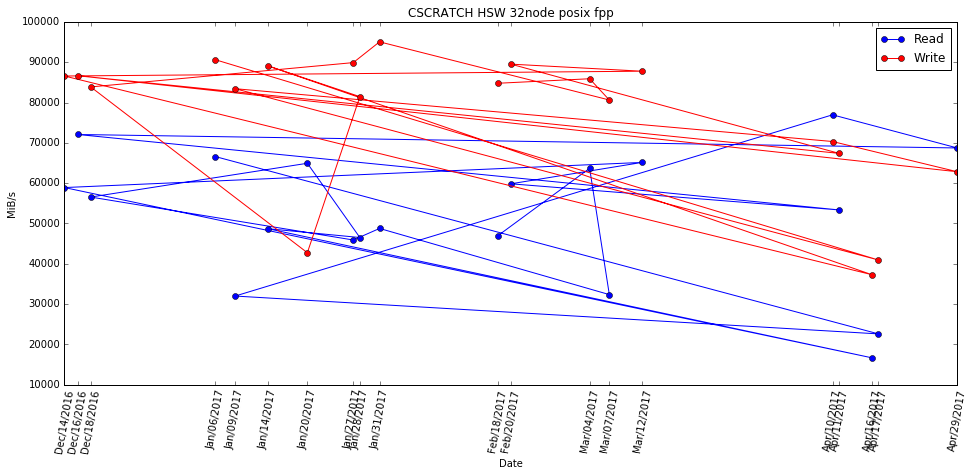

In [9]:
NODES_POSIXMPI_DIR="32node_posix_fpp"
BLOCK_SIZE="1000000" #10000, 100000
title="CSCRATCH HSW 32node posix fpp"
latest=20
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=latest) # options are read, write, readwrite

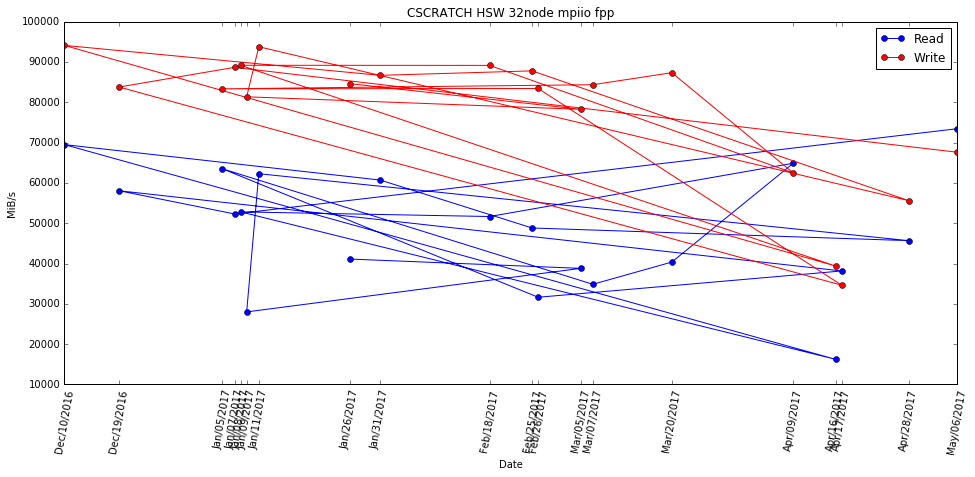

In [10]:
NODES_POSIXMPI_DIR="32node_mpiio_fpp"
BLOCK_SIZE="1000000" #10000, 100000
title="CSCRATCH HSW 32node mpiio fpp"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite

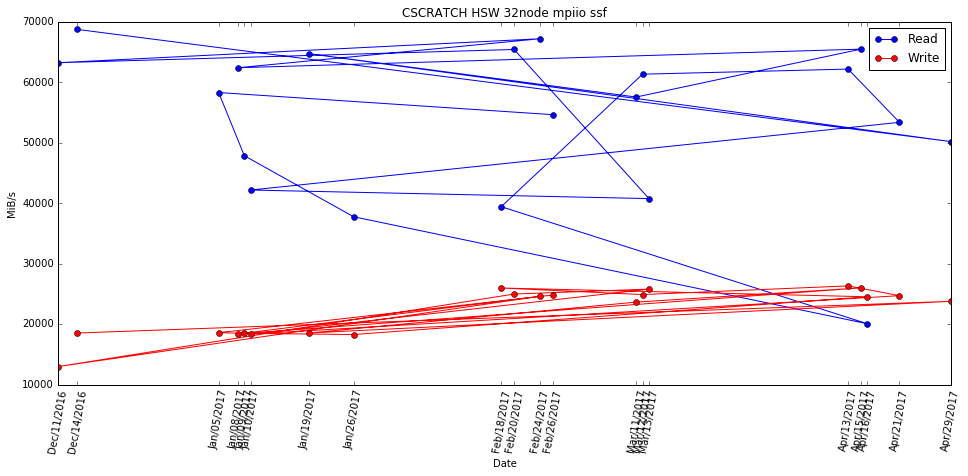

In [11]:
NODES_POSIXMPI_DIR="32node_mpiio_ssf"
BLOCK_SIZE="ssf" #10000, 100000
title="CSCRATCH HSW 32node mpiio ssf"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite